In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

## Importing and Standardizing the Song Data

In [3]:
#import our liked songs data to pandas df
liked_songs_df = pd.read_csv('/Users/jpate/Documents/MySongsDataset.csv')

NameError: name 'pd' is not defined

In [3]:
songs_normalized_df = liked_songs_df.copy()
selected_columns = songs_normalized_df[['danceability',
                                        'energy',
                                        'loudness',
                                        'speechiness',
                                        'acousticness',
                                        'tempo',
                                        'liveness',
                                        'valence',
                                        'mode']]

In [4]:
selected_columns

,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,0.836,0.741,-7.343,0.0465,0.021900,126.041,0.2590,0.559,1
1,0.618,0.605,-8.471,0.0397,0.023400,107.978,0.1180,0.204,0
2,0.668,0.856,-6.386,0.0453,0.083700,79.008,0.0960,0.737,0
3,0.649,0.717,-5.170,0.0544,0.006300,125.001,0.1600,0.305,1
4,0.763,0.665,-9.063,0.0807,0.122000,126.025,0.4760,0.422,0
...,...,...,...,...,...,...,...,...,...
281,0.261,0.592,-4.665,0.0317,0.045100,139.242,0.2540,0.329,1
282,0.573,0.590,-8.430,0.0557,0.667000,108.789,0.6910,0.364,1
283,0.746,0.597,-5.780,0.0810,0.257000,80.034,0.0766,0.381,1
284,0.688,0.671,-7.872,0.0975,0.030400,83.988,0.0782,0.537,1


In [5]:
selected_columns = StandardScaler().fit_transform(selected_columns)
selected_columns_df = pd.DataFrame(selected_columns)
selected_columns_df

In [8]:
normed_features_df = selected_columns_df.rename(columns={0: 'danceability',
                                                         1: 'energy',
                                                         2: 'loudness',
                                                         3:'speechiness',
                                                         4: 'acousticness',
                                                         5: 'tempo',
                                                         6: 'liveness',
                                                         7: 'valence',
                                                         8: 'mode'})

In [9]:
songs_normalized_df = songs_normalized_df.drop(['id',
                                                'danceability',
                                                'energy',
                                                'loudness',
                                                'speechiness',
                                                'acousticness',
                                                'tempo',
                                                'liveness',
                                                'valence',
                                                'mode'],
                                                   axis=1)

In [2]:
songs_normalized

NameError: name 'songs_normalized' is not defined

In [11]:
songs_data = songs_normalized_df.join(normed_features_df)

In [12]:
songs_data.drop(['name'],axis=1)

,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,0,1.545713,0.602294,0.160835,-0.441856,-0.810269,0.149141,0.539636,0.662590,0.814120
1,0,0.310664,0.068414,-0.058472,-0.527526,-0.805893,-0.454782,-0.453308,-0.939382,-1.228321
2,0,0.593932,1.053736,0.346895,-0.456974,-0.629976,-1.423372,-0.608235,1.465832,-1.228321
3,0,0.486290,0.508080,0.583310,-0.342328,-0.855780,0.114369,-0.157537,-0.483610,0.814120
4,0,1.132142,0.303949,-0.173568,-0.010986,-0.518241,0.148606,2.067784,0.044364,-1.228321
...,...,...,...,...,...,...,...,...,...,...
281,1,-1.711871,0.017381,0.681492,-0.628314,-0.742586,0.590506,0.504425,-0.375308,0.814120
282,1,0.055723,0.009530,-0.050500,-0.325950,1.071725,-0.427667,3.581847,-0.217367,0.814120
283,1,1.035830,0.037009,0.464714,-0.007207,-0.124396,-1.389068,-0.744853,-0.140653,0.814120
284,1,0.707239,0.327503,0.057986,0.200669,-0.785472,-1.256869,-0.733586,0.563312,0.814120


In [13]:
#shuffle
songs_data = songs_data.sample(frac=1).reset_index(drop=True)

In [14]:
songs_data

,name,artist,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,Tennis Court,Lorde,1,1.137807,-0.080758,-0.080636,-0.260437,-0.837401,-1.056264,0.525552,0.071439,0.814120
1,Closure,Chase Evers,0,1.137807,0.025233,0.139643,-0.123113,-0.512406,-0.587348,1.433990,0.464035,-1.228321
2,"Après un rêve, Op. 7, No. 1",Gabriel Fauré,0,-2.131108,-2.186442,-3.738460,-0.518707,2.016952,-0.833893,-0.594855,-1.697498,-1.228321
3,24K Magic,Bruno Mars,0,1.443737,0.845680,0.755955,-0.023585,-0.774969,-0.488483,-0.206833,0.992009,0.814120
4,Wolfpack,Johannes Bornlöf,0,-1.111342,-2.162496,-2.893315,-0.518707,1.999448,-1.739860,-0.637108,-1.492626,-1.228321
...,...,...,...,...,...,...,...,...,...,...,...,...
281,Jolly Old St. Nicholas,Atlantic Five Jazz Band,0,-0.658113,-0.944387,-0.906728,-0.562802,0.952113,-1.116612,-0.270212,1.186051,0.814120
282,Whom Shall I Fear (God Of Angel Armies),Chris Tomlin,0,-0.675109,0.747540,0.998009,-0.619495,-0.725374,0.884795,0.610057,0.035339,0.814120
283,Lock It Up (feat. Anderson .Paak),Eminem,1,1.613697,0.617996,0.995092,1.756587,-0.597301,0.516349,-0.723727,0.468548,-1.228321
284,(There's Gotta Be) More To Life,Stacie Orrico,0,0.095380,1.312825,0.852582,0.177992,-0.606637,-1.061179,0.046685,1.068723,0.814120


In [15]:
songs_data.to_csv('/Users/jpate/Documents/normsongs.csv')

## Random Forest Model

In [16]:
train = pd.read_csv('/Users/jpate/Documents/normsongs.csv')

In [17]:
print(train.shape)

(286, 13)


In [18]:
train = train.drop(['Unnamed: 0',
            'name',
            'artist'],
            axis=1)

In [19]:
train.sample(frac=1).reset_index(drop=True)

,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,0,-0.278534,-2.011361,-1.865998,-0.504849,2.028622,-1.243663,-0.298381,-0.393358,0.814120
1,1,0.627924,0.861382,0.818364,1.794383,-0.830107,0.617722,2.828336,-1.124399,0.814120
2,0,-0.561802,-0.449763,-0.372460,0.597523,1.652281,-1.530595,-0.516687,0.865656,0.814120
3,0,-0.726098,1.304974,1.324635,1.504617,-0.188578,2.250751,2.602987,0.170717,-1.228321
4,0,0.712905,-0.979717,0.104258,-0.235240,0.144002,0.215040,-0.827246,0.703203,-1.228321
...,...,...,...,...,...,...,...,...,...,...
281,0,1.137807,0.025233,0.139643,-0.123113,-0.512406,-0.587348,1.433990,0.464035,-1.228321
282,1,-0.301195,0.217586,0.304900,-0.416659,-0.249843,0.284215,-0.573025,-1.680802,0.814120
283,1,-0.097242,0.205810,0.503209,3.633768,-0.746379,0.539887,-0.319507,0.982984,0.814120
284,0,-0.448495,0.704359,0.496793,-0.537605,-0.636978,0.482180,1.124135,-0.876206,0.814120


In [20]:
labels = train.pop('jacoborgina')

In [21]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, stratify=labels)

In [22]:
rf = RandomForestClassifier(random_state=0, max_depth = 80, n_estimators = 35)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, n_estimators=35, random_state=0)

In [23]:
y_pred = rf.predict(x_test)

In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7638888888888888

## Experimenting with Feature Importances

In [25]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


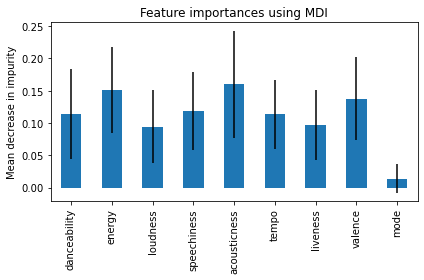

In [26]:
forest_importances = pd.Series(importances, index=train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

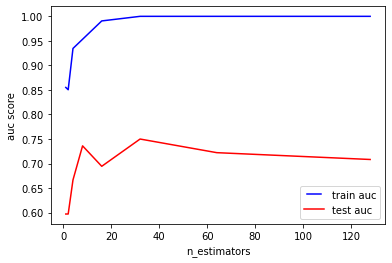

In [27]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 128]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, max_depth = 80, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label="train auc")
line2, = plt.plot(n_estimators, test_results, 'r', label="test auc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("auc score")
plt.xlabel("n_estimators")
plt.show()

## K-Nearest Neighbor Model

In [28]:
train = pd.read_csv('/Users/jpate/Documents/normsongs.csv')

In [29]:
train = train.drop(['Unnamed: 0',
            'name',
            'artist'],
            axis=1)

In [30]:
train.sample(frac=1).reset_index(drop=True)

,jacoborgina,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,mode
0,1,-0.578798,1.214685,0.814281,0.131377,-0.850208,1.455283,-0.604714,-0.244442,-1.228321
1,1,-1.422937,0.492377,0.715710,-0.615716,-0.798892,1.614564,-0.333591,-0.975483,0.814120
2,0,0.928189,0.040935,-0.049528,-0.378863,-0.681322,-0.820586,-0.597672,1.222151,0.814120
3,1,0.208687,-0.375177,0.232965,-0.669889,0.753732,-0.186037,0.434004,-0.564837,-1.228321
4,0,0.593932,1.053736,0.346895,-0.456974,-0.629976,-1.423372,-0.608235,1.465832,-1.228321
...,...,...,...,...,...,...,...,...,...,...
281,1,-0.255872,0.614070,-0.015116,-0.556503,-0.862986,0.750222,-0.734994,-0.907794,0.814120
282,0,1.585371,-0.775587,0.052737,0.038148,-0.354868,0.280571,-0.319507,0.373783,0.814120
283,0,-0.658113,-0.944387,-0.906728,-0.562802,0.952113,-1.116612,-0.270212,1.186051,0.814120
284,0,1.443737,0.845680,0.755955,-0.023585,-0.774969,-0.488483,-0.206833,0.992009,0.814120


In [31]:
labels = train.pop('jacoborgina')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, stratify=labels, random_state=0)

Text(0, 0.5, 'Error Rate')

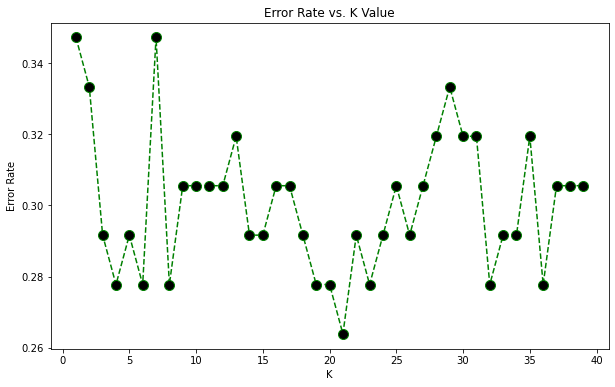

In [33]:
#how to choose value of k

error_rate = []
# Will take some time
for i in range(1,40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         error_rate,color = 'green', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='black', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

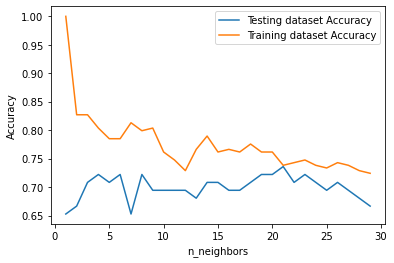

In [34]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        36
           1       0.72      0.72      0.72        36

    accuracy                           0.72        72
   macro avg       0.72      0.72      0.72        72
weighted avg       0.72      0.72      0.72        72



## Multilayer Perceptron Model

In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(80,10,80),
                   max_iter=800)
mlp.fit(x_train,y_train)
predictions = mlp.predict(x_test)

In [64]:
print(confusion_matrix(y_test,predictions))

[[23 13]
 [11 25]]


In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        36
           1       0.66      0.69      0.68        36

    accuracy                           0.67        72
   macro avg       0.67      0.67      0.67        72
weighted avg       0.67      0.67      0.67        72

